In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Golden Section Search

The golden section search is a bracketing method. We assume that $f$ is a unimodal function. We start with an interval $[a,b]$. The minimizer $x^*$ lies along this interval. This is because unimodality implies that $f$ decreases from $a$ to the minimizer and increases up to $b$. We can shrink the interval along $x^*$ letting one of  $\tilde{a}$ or $\tilde{b}$,
\
\
$$\tilde{a} = b - \frac{b-a}{\varphi}, \qquad \tilde{b} = a + \frac{b-a}{\varphi}$$
\
\
and $\varphi$ is the golden ratio, be one of the edgepoints of two new sub-brackets. The optimizer $x^*$ will be in one of $[a, \tilde{b}]$ or $[\tilde{a}, b]$. The algorithm works as follows:

* If $f(\tilde{a}) < f(\tilde{b})$, then $x^* \in [a,\tilde{b}]$. We then set $b = \tilde{b}$.
* If $f(\tilde{a}) > f(\tilde{b})$, then $x^* \in [\tilde{a}, b]$. We then set $a = \tilde{a}$.
* Rinse and repeat.
\
\
The advantage to the golden section search is that it doesn't involve derivatives.

In [2]:
def golden_search(f, a, b, maxiter=int(1e6), tol=1e-12):
    
    # Define golden ratio
    ϕ = (1 + np.sqrt(5)) / 2
    
    # Initialize the first guess of the minimizer as the midpoint between a and b
    x0 = (a + b) / 2
    
    # Optimization
    for k in range(0, maxiter):
        tilde_a = b - (b - a) / ϕ
        tilde_b = a + (b - a) / ϕ
        
        # Check if x* is in [a, tilde_b]
        if f(tilde_a) < f(tilde_b):
            b = tilde_b
    
        # Check if x* is in [tilde_a, b]
        else:
            a = tilde_b
        
        # Stopping criterion
        x1 = (a + b) / 2
        if np.abs((x0 - x1) / x0) < tol:
            break
        
        # Update x0
        x0 = x1
        
    return x0

In [3]:
f = lambda x: np.exp(x) - 4*x
a = 0
b = 3

root = golden_search(f, a, b)
print(root)

1.416407865001708


<IPython.core.display.Javascript object>


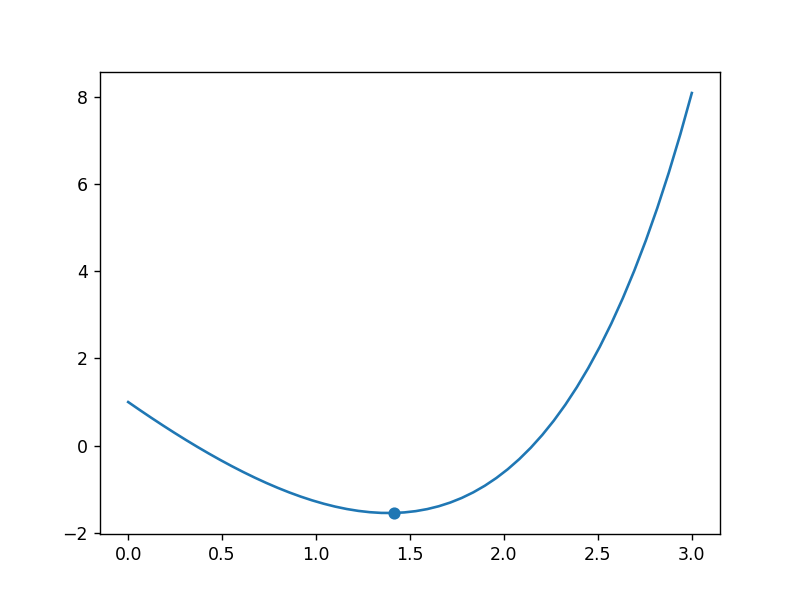

In [4]:
plt.figure()

xs = np.linspace(a,b)
plt.plot(xs, f(xs))
plt.scatter(root, f(root))

# SciPy implementation

In [5]:
from scipy import optimize as opt

In [6]:
root_scipy = opt.golden(f, brack=(0,3), tol=1e-12)
print(root_scipy)

1.3862943788613058
